In [1]:
from generators.brownian_motion_generator import BrownianMotionDataset
from generators.poisson_process_generator import PoissonProcessDataset
from models.vanilla_transformer import TransformerModel
from probes.linear_probe import LinearProbe
import matplotlib.pyplot as plt


checkpoint_path = "/home/wojciech/private/magisterka/TFTS/training/transformer_stochastic_processes/8m8gd9lj/checkpoints/transformer-epoch=996-val_loss=0.10.ckpt"

# Load the trained model
model = TransformerModel.load_from_checkpoint(checkpoint_path)

# Create the DataLoader for evaluation
val_loader = BrownianMotionDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=100).get_dataloader()

# Initialize the linear probe with the transformer model
probe = LinearProbe(model_path=checkpoint_path, input_dim=128, output_dim=2)  # Assuming `d_model` is 128
# Fine-tune the linear probe using the training data (optional)
# If needed, create a train_loader like val_loader and call finetune
train_loader = BrownianMotionDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=5000).get_dataloader()
probe.finetune(train_loader, num_epochs=10)

# Evaluate the probe on the validation dataset
val_loss, predictions, labels = probe.evaluate(val_loader)



/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/10 - Loss: 1640.5017
Epoch 2/10 - Loss: 1633.7020
Epoch 3/10 - Loss: 1630.0908
Epoch 4/10 - Loss: 1626.4891
Epoch 5/10 - Loss: 1622.9337
Epoch 6/10 - Loss: 1619.4048
Epoch 7/10 - Loss: 1615.8850
Epoch 8/10 - Loss: 1612.3351
Epoch 9/10 - Loss: 1608.9384
Epoch 10/10 - Loss: 1605.3780
Validation MSE: 1912.6661


Text(0.5, 1.0, 'Probe results on embedding')

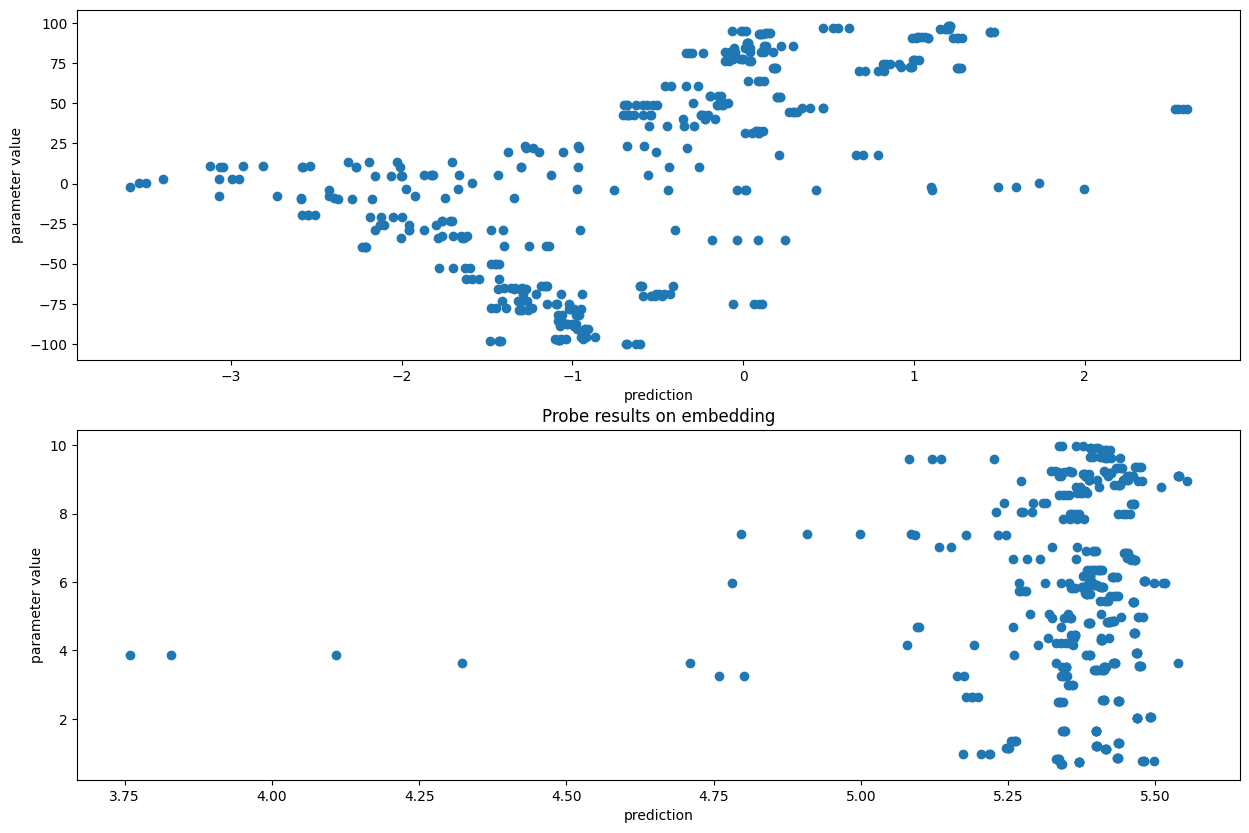

In [3]:
num_dims = predictions.shape[1]
if num_dims == 1:
    plt.scatter(predictions, labels)
    plt.xlabel("prediction")
    plt.ylabel("parameter value")
else:
    fig, axes = plt.subplots(num_dims, figsize=(15, 10))
    for i in range(num_dims):
        axes[i].scatter(predictions[:, i], labels[:, i])
        axes[i].set_xlabel("prediction")
        axes[i].set_ylabel("parameter value")
plt.title("Probe results on embedding")

In [4]:
batch_idx, (x, y)  = next( enumerate(train_loader))
y = train_loader.dataset.get_parameters(y)
y = y.float().to('cuda')

In [5]:
y.shape

torch.Size([16, 2])

In [10]:
checkpoint_path = "/home/wojciech/private/magisterka/TFTS/training/transformer_stochastic_processes/jxopcc0x/checkpoints/transformer-epoch=56-val_loss=0.18.ckpt"

model = TransformerModel.load_from_checkpoint(checkpoint_path)

# Create the DataLoader for evaluation
val_loader = BrownianMotionDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=100).get_dataloader()

# Initialize the linear probe with the transformer model
probe = LinearProbe(model_path=checkpoint_path, input_dim=128, benchmark=True, output_dim=2)  # Assuming `d_model` is 128
# Fine-tune the linear probe using the training data (optional)
# If needed, create a train_loader like val_loader and call finetune
train_loader = BrownianMotionDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=1000).get_dataloader()
probe.finetune(train_loader, num_epochs=20)

# Evaluate the probe on the validation dataset
val_loss, predictions, labels = probe.evaluate(val_loader)
print(f"Validation Loss (MSE): {val_loss:.4f}")

Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/20 - Loss: 20.1694
Epoch 2/20 - Loss: 16.8188
Epoch 3/20 - Loss: 15.4574
Epoch 4/20 - Loss: 14.1906
Epoch 5/20 - Loss: 12.9479
Epoch 6/20 - Loss: 12.2450
Epoch 7/20 - Loss: 10.9041
Epoch 8/20 - Loss: 10.2402
Epoch 9/20 - Loss: 9.2903
Epoch 10/20 - Loss: 8.5683
Epoch 11/20 - Loss: 8.1488
Epoch 12/20 - Loss: 7.4564
Epoch 13/20 - Loss: 7.3127
Epoch 14/20 - Loss: 6.6189
Epoch 15/20 - Loss: 6.1789
Epoch 16/20 - Loss: 5.7992
Epoch 17/20 - Loss: 5.4966
Epoch 18/20 - Loss: 5.2621
Epoch 19/20 - Loss: 5.1148
Epoch 20/20 - Loss: 5.0226
Validation MSE: 4.2330
Validation Loss (MSE): 4.2330


Text(0.5, 1.0, 'Probe results on embedding')

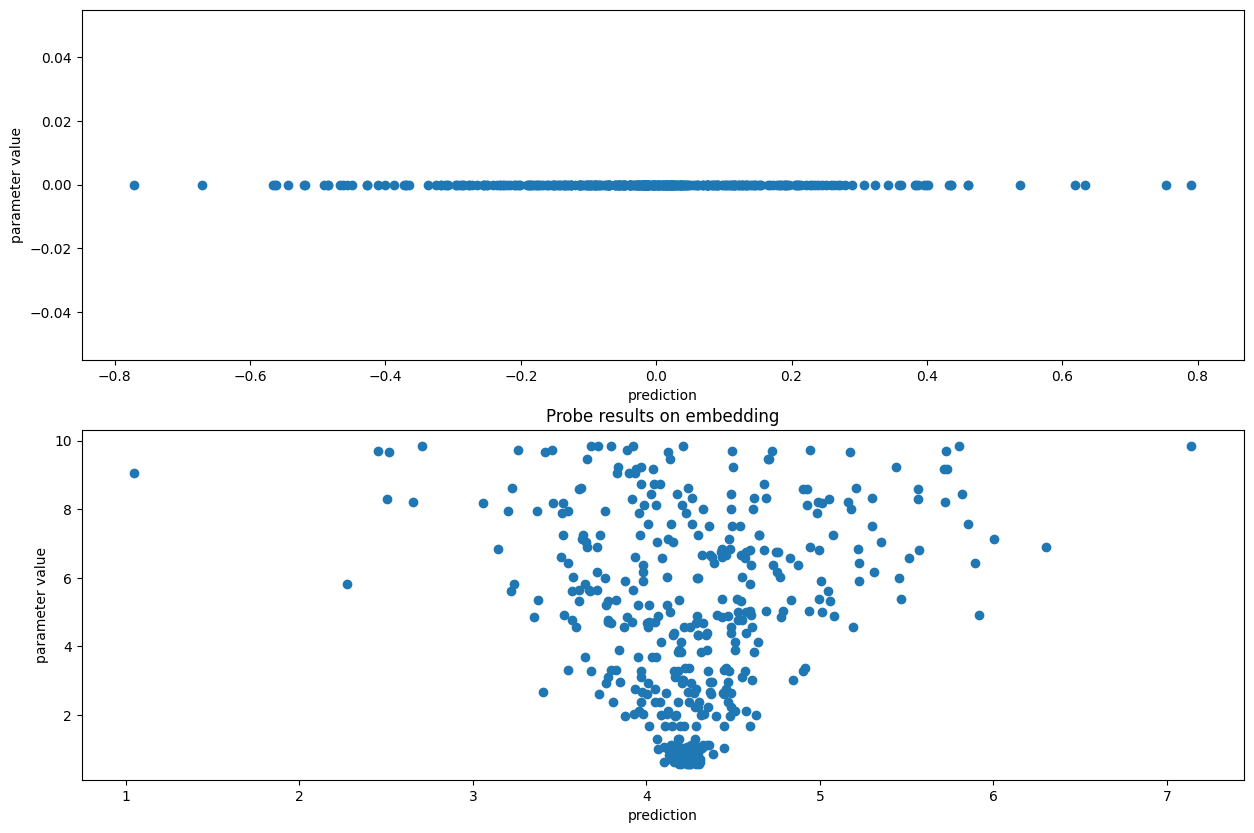

In [11]:
num_dims = predictions.shape[1]
if num_dims == 1:
    plt.scatter(predictions, labels)
    plt.xlabel("prediction")
    plt.ylabel("parameter value")
else:
    fig, axes = plt.subplots(num_dims, figsize=(15, 10))
    for i in range(num_dims):
        axes[i].scatter(predictions[:, i], labels[:, i])
        axes[i].set_xlabel("prediction")
        axes[i].set_ylabel("parameter value")
plt.title("Probe results on embedding")